In [2]:
# Football Transfer Fee Prediction: Visualizations and Dashboard

# This notebook visualizes key insights from the football transfer fee prediction project, including feature importance, transfer fee distributions, and prediction errors.


In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

# Set style for better visualization
plt.style.use('seaborn-v0_8')  # Updated style
sns.set_palette("husl")

# Load data
csv_path = "/home/sami/Desktop/football_prediction_project/True_players_data.csv"
df = pd.read_csv(csv_path)

# Load Kafka predictions
gk_pred_path = "/home/sami/Desktop/football_prediction_project/kafka_predictions_gk.csv/part-00000-3588fccc-09a6-4d41-9989-75f0b0c44491-c000.csv"
field_pred_path = "/home/sami/Desktop/football_prediction_project/kafka_predictions_field.csv/part-00000-56a116ce-cdca-45fc-bcfc-3b70cfb31ae6-c000.csv"
gk_pred = pd.read_csv(gk_pred_path)
field_pred = pd.read_csv(field_pred_path)

# Combine predictions with original data (assuming 'Name' as key)
#df = pd.concat([df, gk_pred[['Name', 'Prediction_euros']], field_pred[['Name', 'Prediction_euros']]], 
 #               on='Name', how='left').fillna({'Prediction_euros': df['Value']})

# First concatenate all predictions
all_predictions = pd.concat([
    gk_pred[['Name', 'Prediction_euros']],
    field_pred[['Name', 'Prediction_euros']]
]).drop_duplicates('Name')

# Then merge with original df
df = pd.merge(df, all_predictions, on='Name', how='left')
df['Prediction_euros'] = df['Prediction_euros'].fillna(df['Value'])

# Clean and convert columns
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df['Wage'] = pd.to_numeric(df['Wage'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Prediction_euros'] = pd.to_numeric(df['Prediction_euros'], errors='coerce')

# Drop rows with missing values in key columns
df = df.dropna(subset=['Value', 'Wage', 'Age', 'Team'])


# EDA Visualizations


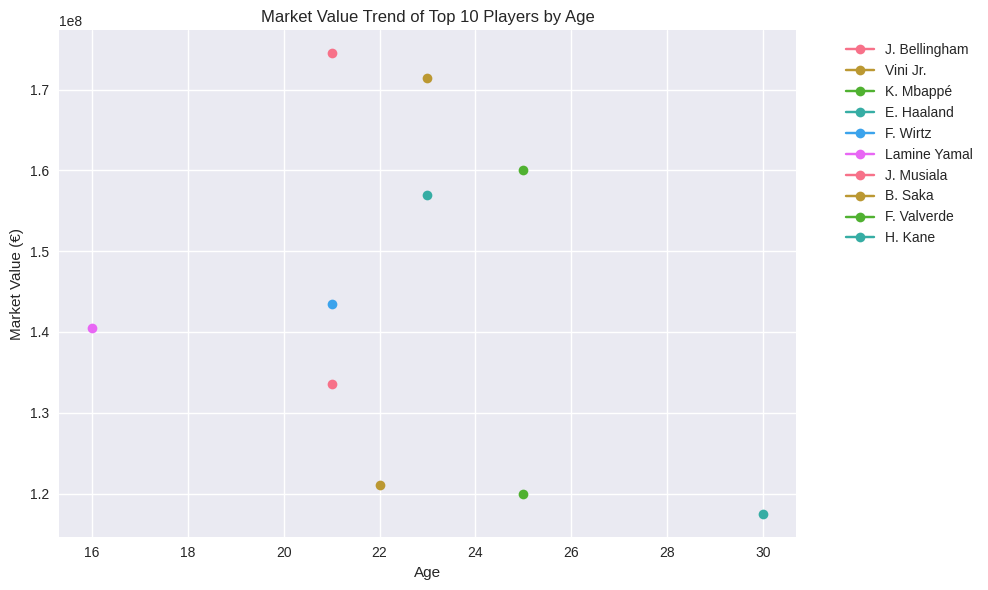

In [2]:
# 1. Line Chart: Trend of Top Players' Market Value Over Age
top_players = df.sort_values(by='Value', ascending=False)
top_players = top_players.drop_duplicates(subset=["Name"]).head(10)
plt.figure(figsize=(10, 6))
for player in top_players['Name']:
        player_data = top_players[top_players['Name'] == player]
        plt.plot(player_data['Age'], player_data['Value'], marker='o', label=player)
plt.title('Market Value Trend of Top 10 Players by Age')
plt.xlabel('Age')
plt.ylabel('Market Value (€)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

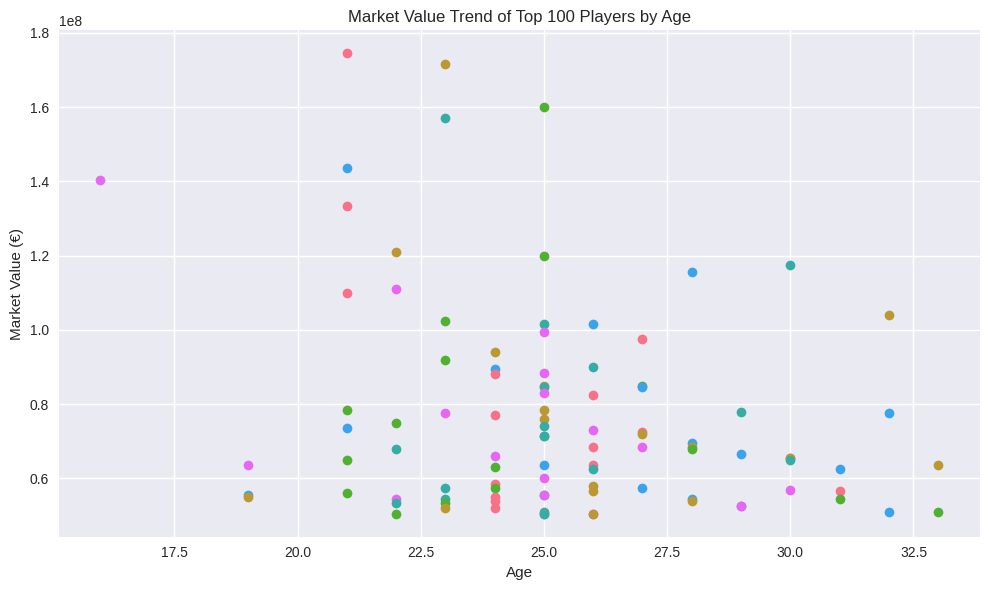

In [4]:
# 1. Line Chart: Trend of Top Players' Market Value Over Age\n",
top_players = df.sort_values(by='Value', ascending=False)
top_players = top_players.drop_duplicates(subset=["Name"]).head(100)
plt.figure(figsize=(10, 6))
for player in top_players['Name']:
    player_data = top_players[top_players['Name'] == player]
    plt.plot(player_data['Age'], player_data['Value'], marker='o', label=player)
plt.title('Market Value Trend of Top 100 Players by Age')
plt.xlabel('Age')
plt.ylabel('Market Value (€)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

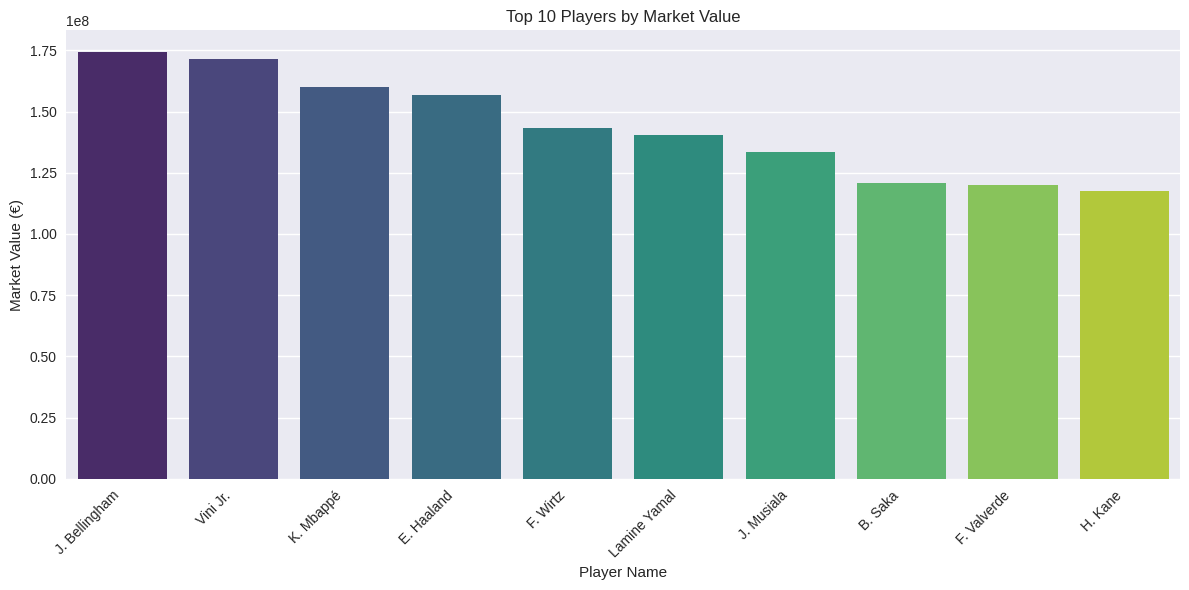

In [6]:
# 2. Bar Chart: Top 10 Players by Market Value
top_players_value = df.sort_values(by='Value', ascending=False)
top_players = top_players.drop_duplicates(subset=["Name"]).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Value', data=top_players, palette='viridis')
plt.title('Top 10 Players by Market Value')
plt.xlabel('Player Name')
plt.ylabel('Market Value (€)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

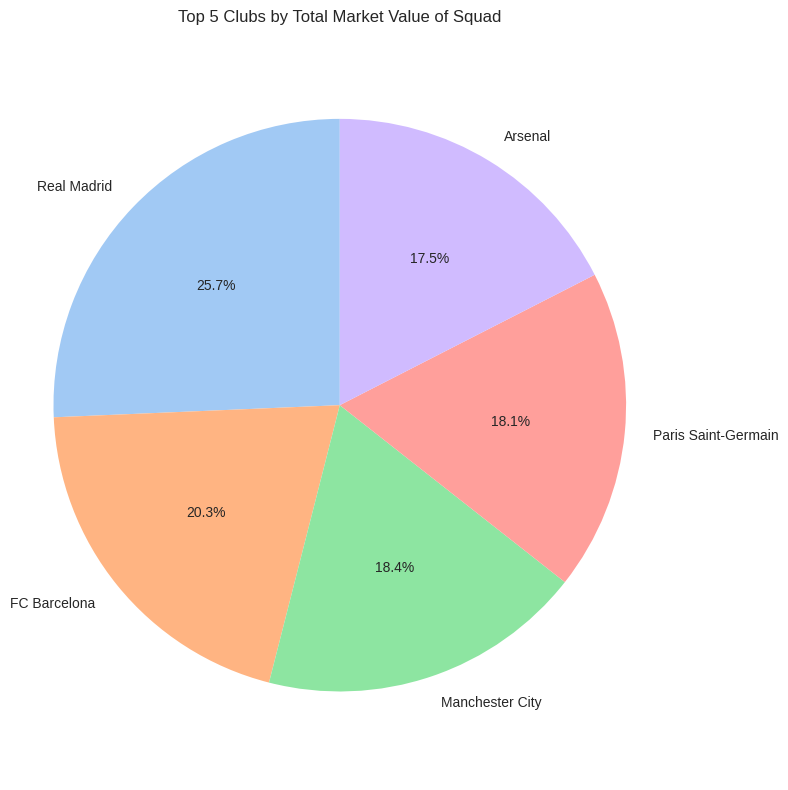

In [7]:
# 3. Pie Chart: Distribution of Top Clubs by Market Value Squad
club_value = df.groupby('Team')['Value'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 8))
plt.pie(club_value, labels=club_value.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 5 Clubs by Total Market Value of Squad')
plt.axis('equal')
plt.tight_layout()
plt.show()

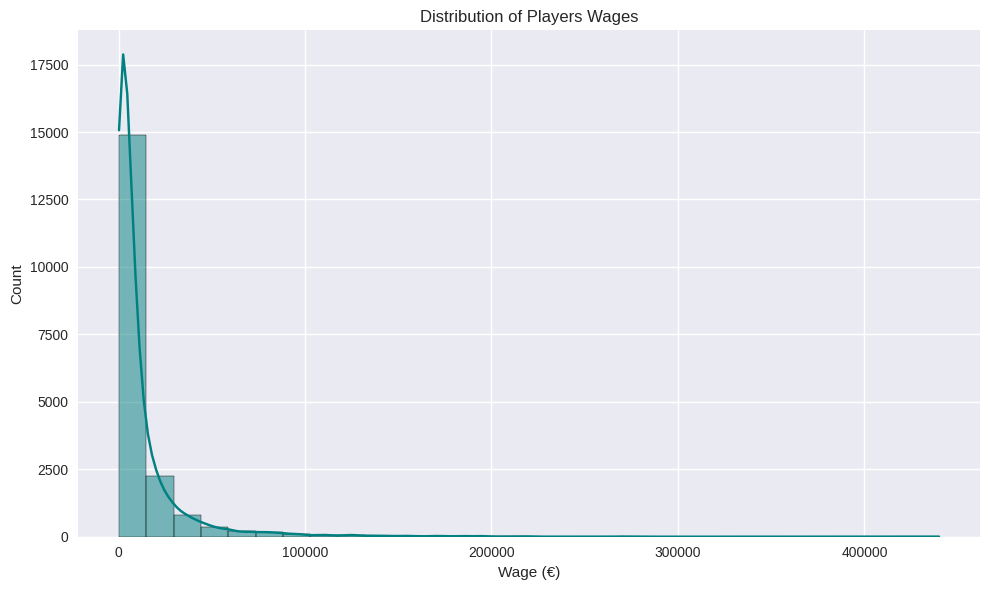

In [8]:
# 4. Histogram: Distribution of Wages
plt.figure(figsize=(10, 6))
sns.histplot(df['Wage'], bins=30, kde=True, color='teal')
plt.title('Distribution of Players Wages')
plt.xlabel('Wage (€)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

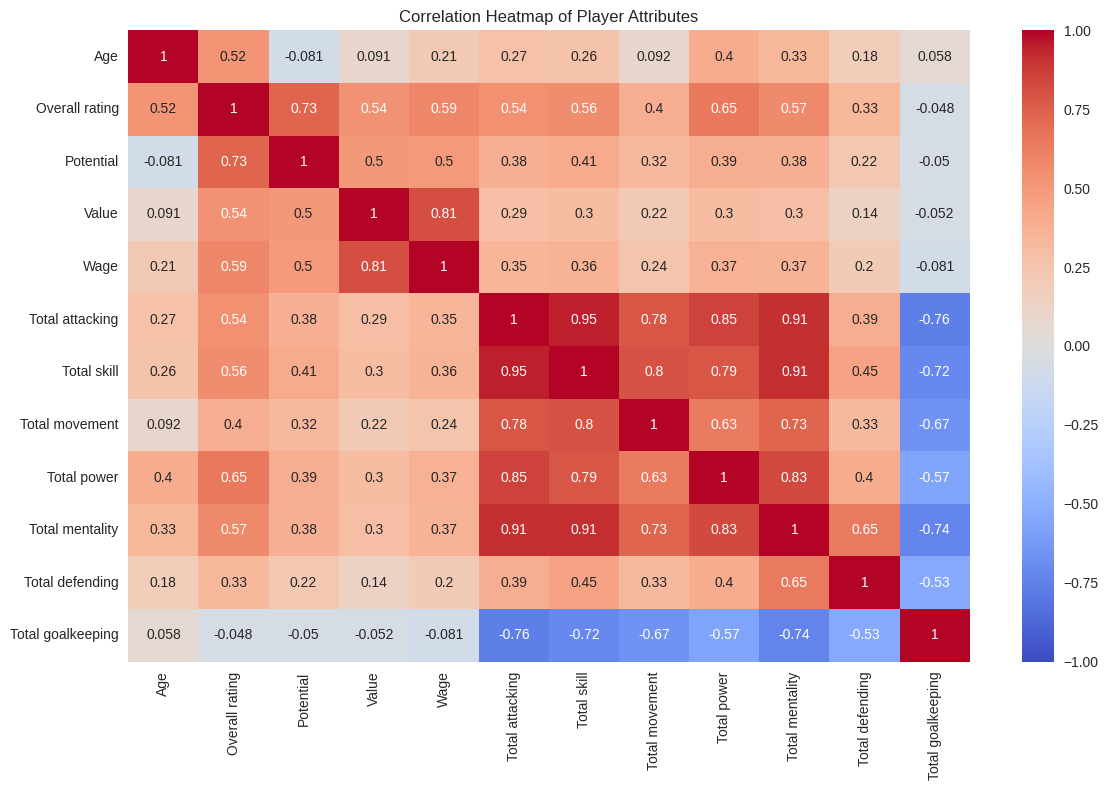

In [9]:
# 5. Heatmap: Correlation Between Numeric Features
numeric_cols = ['Age', 'Overall rating', 'Potential', 'Value', 'Wage', 'Total attacking', 'Total skill', 'Total movement', 'Total power', 'Total mentality', 'Total defending', 'Total goalkeeping']
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Player Attributes')
plt.tight_layout()
plt.show()

/home/sami/Desktop/football_prediction_project/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_59578/991905663.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


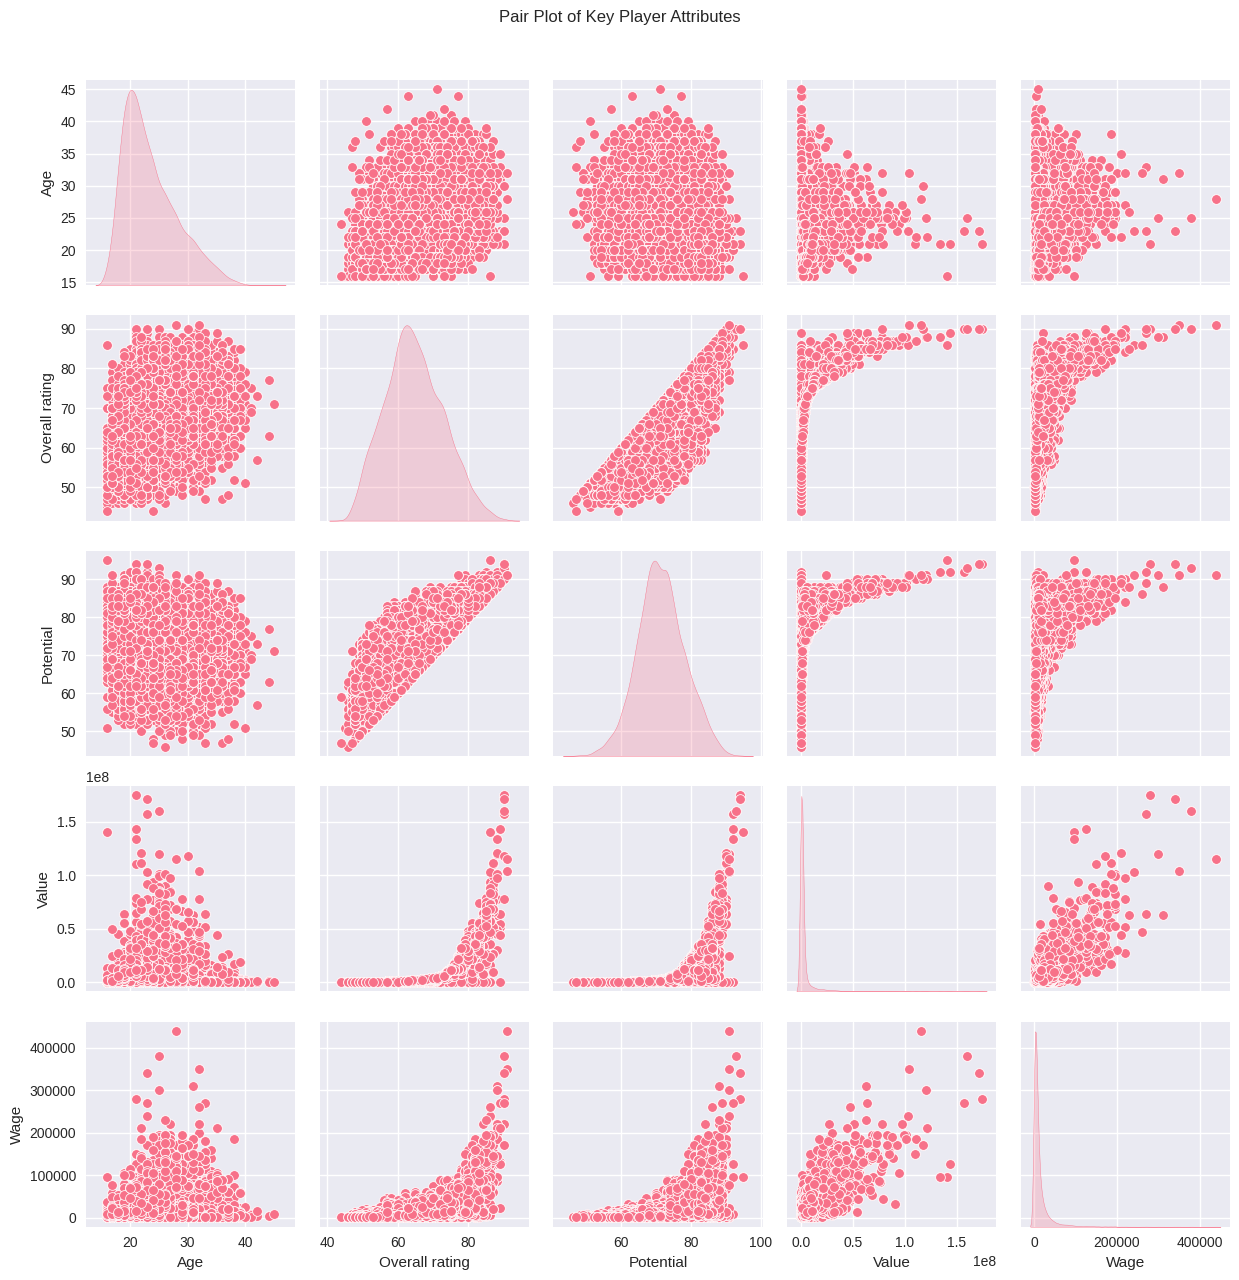

In [14]:
# 6. Pair Plot: Quick EDA of Key Numeric Features
sns.pairplot(df[['Age', 'Overall rating', 'Potential', 'Value', 'Wage']], diag_kind='kde')
plt.suptitle('Pair Plot of Key Player Attributes', y=1.02)
plt.tight_layout()
plt.show()

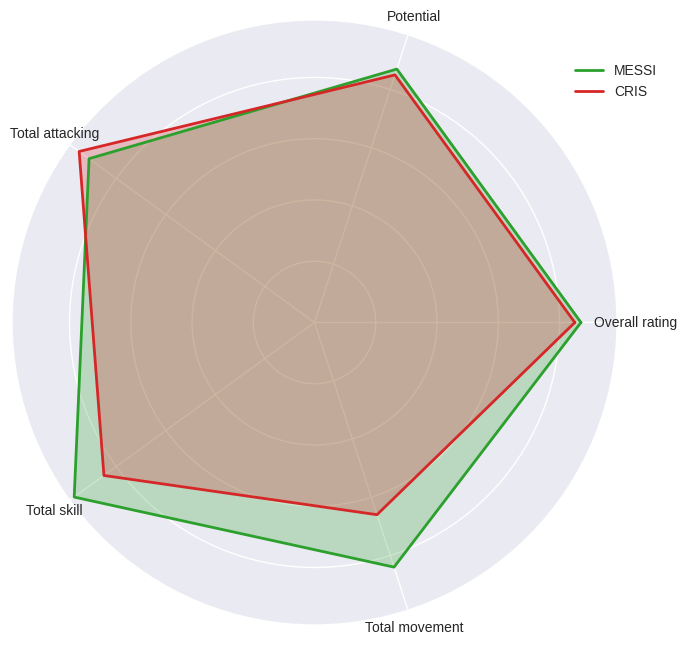

In [44]:
def plot_radar_chart(player1, player2, df):
    # Select players
    p1_data = df[df['Name'] == player1].iloc[0]
    p2_data = df[df['Name'] == player2].iloc[0]
    
    # Features to compare (max 5)
    categories = ['Overall rating', 'Potential', 'Total attacking', 'Total skill', 'Total movement']
    N = len(categories)
    
    # Normalize data (0 to 100 scale)
    p1_values = [p1_data[cat] / 100 for cat in categories]
    p2_values = [p2_data[cat] / 100 for cat in categories]
    values = [p1_values, p2_values]
    labels = ['MESSI', 'CRIS']
    
    # Custom colors for each player
    colors = ['#2ca02c', '#d62728']  # Green for Messi, Red for Ronaldo
    
    # Repeat first value to close the circle
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Plot
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    for i, (value, label) in enumerate(zip(values, labels)):
        value += value[:1]
        ax.plot(angles, value, linewidth=2, linestyle='solid', 
                label=label, color=colors[i])
        ax.fill(angles, value, alpha=0.25, color=colors[i])
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    plt.legend(loc='center', bbox_to_anchor=(1.0,0.9))
    plt.tight_layout()
    plt.show()

plot_radar_chart('L. Messi', 'Cristiano Ronaldo', df)

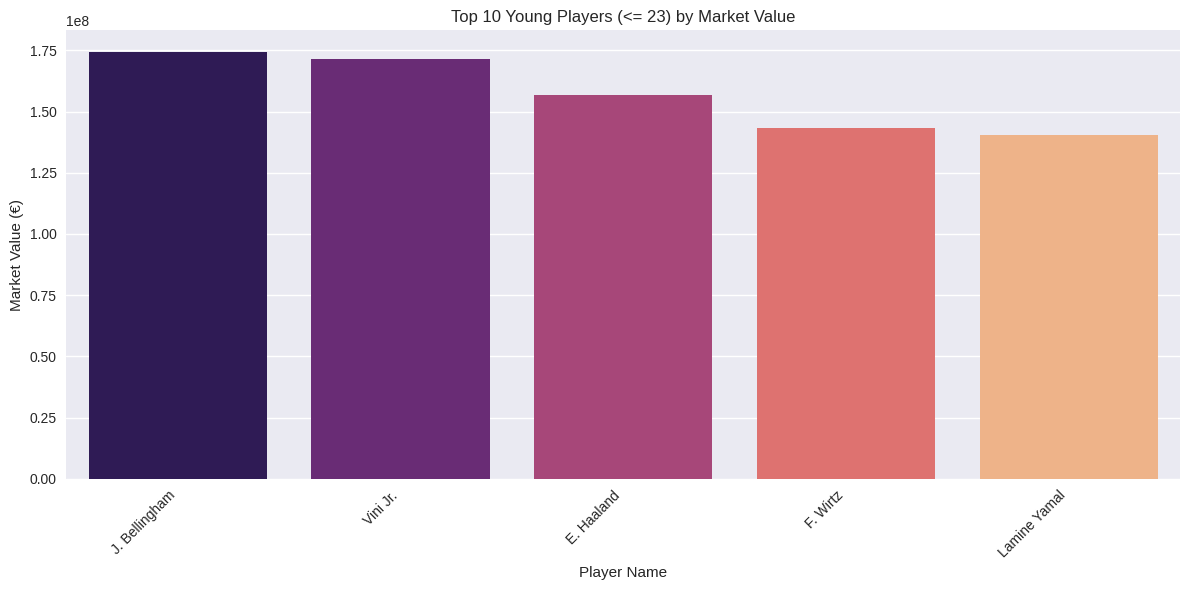

In [16]:
# 8. Young Top Players for Recruiters (Bar Chart)
young_players = df[df['Age'] <= 23].sort_values(by='Value', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Value', data=young_players, palette='magma')
plt.title('Top 10 Young Players (<= 23) by Market Value')
plt.xlabel('Player Name')
plt.ylabel('Market Value (€)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

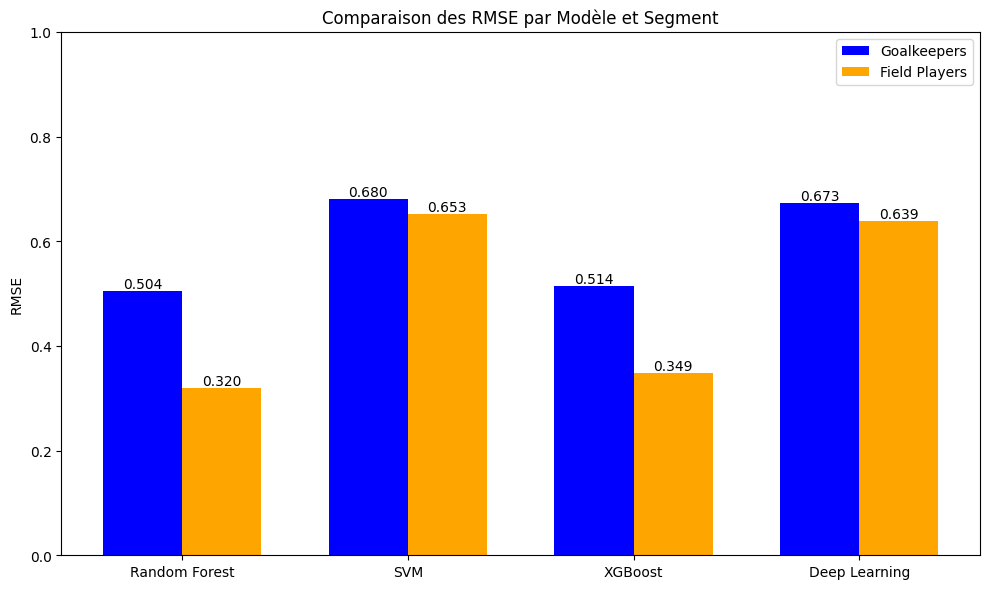

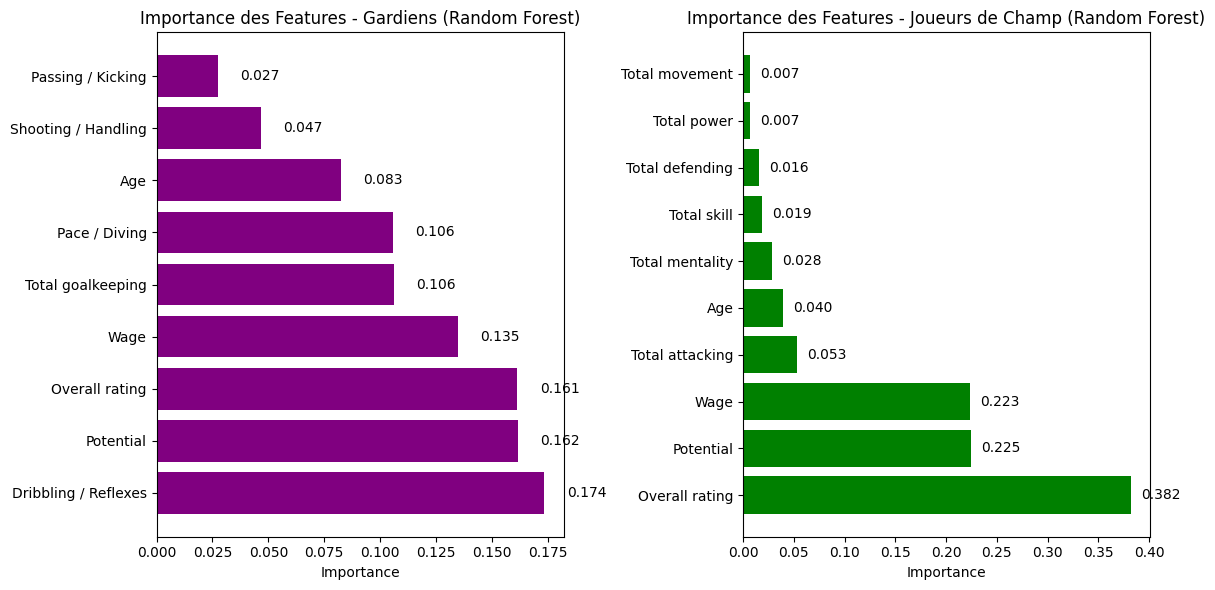

In [1]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import numpy as np

# Données extraites des logs pour le graphique des RMSE
rmse_data = {
    "Goalkeepers": {
        "Random Forest": 0.504041628857345,
        "SVM": 0.6803885519133591,
        "XGBoost": 0.5135742229887637,
        "Deep Learning": 0.6729387818447983
    },
    "Field Players": {
        "Random Forest": 0.32011203025294677,
        "SVM": 0.6525962759103101,
        "XGBoost": 0.3488355444785792,
        "Deep Learning": 0.638697158405743
    }
}

# Figure 4.1 : Comparaison des RMSE par Modèle (Screen 3)
models = list(rmse_data["Goalkeepers"].keys())
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, [rmse_data["Goalkeepers"][model] for model in models], width, label="Goalkeepers", color="blue")
bars2 = ax.bar(x + width/2, [rmse_data["Field Players"][model] for model in models], width, label="Field Players", color="orange")

ax.set_ylabel("RMSE")
ax.set_title("Comparaison des RMSE par Modèle et Segment")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)
ax.legend()

# Ajout des valeurs sur les barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Figure 4.2 : Importance des Features pour Random Forest
# Données d'importance des features extraites des logs
feature_importance_gk = {
    "Dribbling / Reflexes": 0.17350639936674664,
    "Potential": 0.1616328965299045,
    "Overall rating": 0.16144252744219073,
    "Wage": 0.1347567464707553,
    "Total goalkeeping": 0.10604041821657093,
    "Pace / Diving": 0.1058008616041524,
    "Age": 0.08253286922933993,
    "Shooting / Handling": 0.0467911407855578,
    "Passing / Kicking": 0.027496140354781762
}

feature_importance_field = {
    "Overall rating": 0.381714414983132,
    "Potential": 0.2246658619029825,
    "Wage": 0.22319561621813358,
    "Total attacking": 0.05332087401230284,
    "Age": 0.03967937148169123,
    "Total mentality": 0.028271847318136843,
    "Total skill": 0.019056039007056155,
    "Total defending": 0.016107034847920334,
    "Total power": 0.007123016915728926,
    "Total movement": 0.006865923312915481
}

# Création des graphiques en barres horizontales pour chaque segment
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gardiens
features_gk = list(feature_importance_gk.keys())
values_gk = list(feature_importance_gk.values())
ax1.barh(features_gk, values_gk, color="purple")
ax1.set_title("Importance des Features - Gardiens (Random Forest)")
ax1.set_xlabel("Importance")
for i, v in enumerate(values_gk):
    ax1.text(v + 0.01, i, f'{v:.3f}', va='center')

# Joueurs de champ
features_field = list(feature_importance_field.keys())
values_field = list(feature_importance_field.values())
ax2.barh(features_field, values_field, color="green")
ax2.set_title("Importance des Features - Joueurs de Champ (Random Forest)")
ax2.set_xlabel("Importance")
for i, v in enumerate(values_field):
    ax2.text(v + 0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()